<a href="https://colab.research.google.com/github/vanadhia/digitalskolads11_portfolio/blob/master/Project_Smart_Python_Group_4_DigitalSkola_Telco_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about final project bootcamp data science batch11 of DigitalSkola. Data modelling from https://www.kaggle.com/datasets/blastchar/telco-customer-churn



by:  Vanadhia Amanita, Pingki Vila Tri Wahyuni, Jaelani U. Wahyu
____

**Contents:**
1. EDA
2. Visualization
3. Correlation
4. Data Pre-Processing
5. Modelling
6. Modelling with Handling Imbalance Data-Oversampling (SMOTE)

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv ("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Telco_churn.csv") 
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data = data.drop(columns=['customerID'])

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(to_replace = " ", value = "0").astype(float)
data['TotalCharges'] = data['TotalCharges'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.265086
std,0.368612,24.559481,30.090047,2266.790864
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.000000
50%,0.000000,29.000000,70.350000,1394.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8684.000000


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


# Visualization

Visualization based on demographic data

---

According to below charts, the following are characteristics of customers that are churn: 
1. Customer with no partner

2. Customer with no dependents

3. Customer who are younger citizen






In [ ]:
dataA = pd.crosstab([data.gender, data.SeniorCitizen,data.Partner,data.Dependents],data.Churn,margins = True).style.background_gradient(vmin=0)
dataA

Text(0.5, 1.0, 'SeniorCitizen <--> Churn')

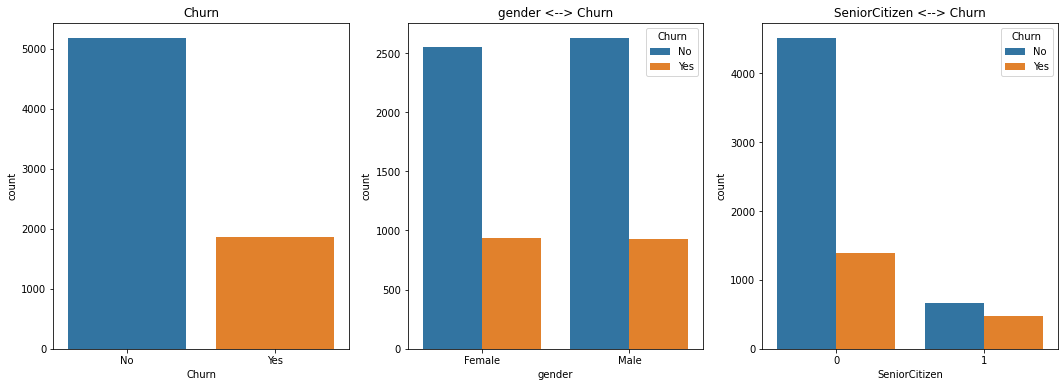

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(data.Churn,ax=ax[0])
ax[0].set_title('Churn')
sns.countplot(data.gender,hue=data.Churn,ax=ax[1])
ax[1].set_title('gender <--> Churn')
sns.countplot(data.SeniorCitizen,hue=data.Churn,ax=ax[2])
ax[2].set_title('SeniorCitizen <--> Churn')

Text(0.5, 1.0, 'Dependents <--> Churn')

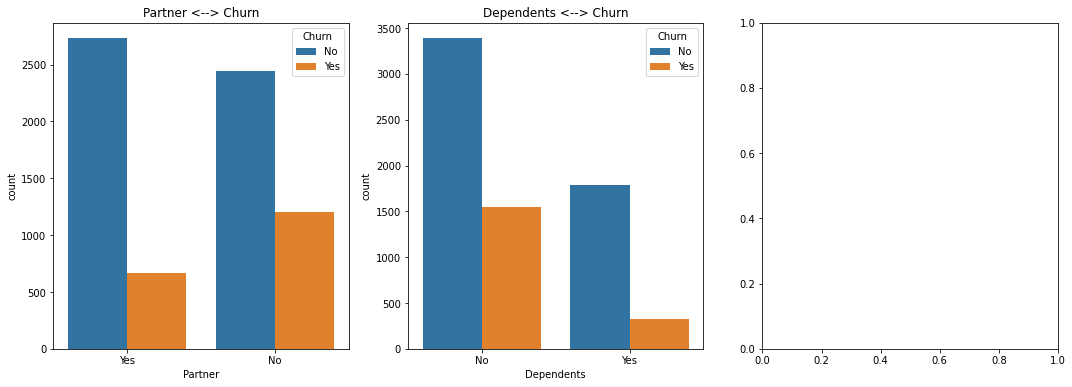

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(data.Partner,hue=data.Churn,ax=ax[0])
ax[0].set_title('Partner <--> Churn')
sns.countplot(data.Dependents,hue=data.Churn,ax=ax[1])
ax[1].set_title('Dependents <--> Churn')


Visualization based on customer account information

---

Based on below charts:
Customer are more likely to churn when in month-to-month contracts and pay monthly charges above USD 70. 

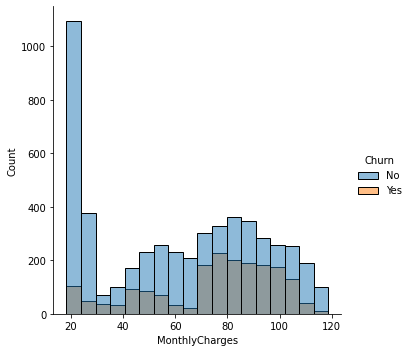

In [ ]:
sns.displot(data, x="MonthlyCharges", hue="Churn")

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(to_replace = " ", value = "0").astype(float)

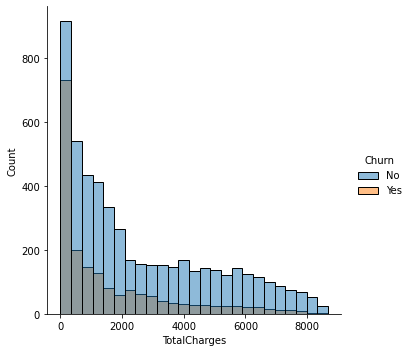

In [ ]:
sns.displot(data, x="TotalCharges", hue="Churn")

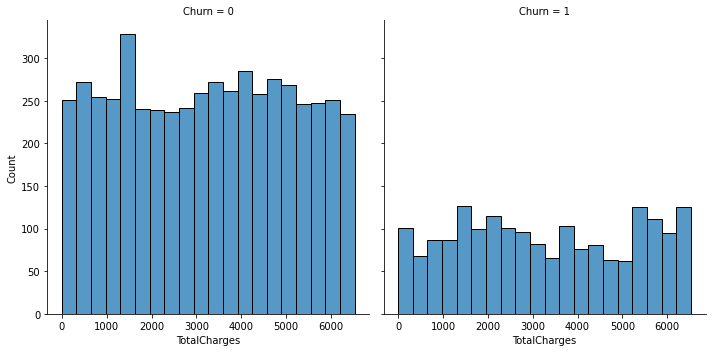

In [ ]:
sns.displot(data, x="TotalCharges", col="Churn")

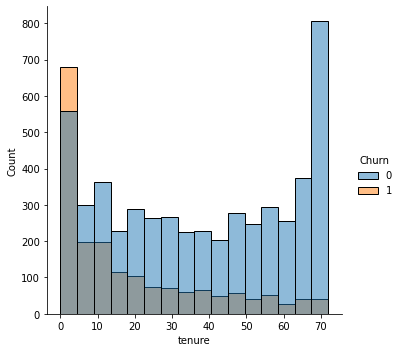

In [ ]:
sns.displot(data, x="tenure", hue="Churn")

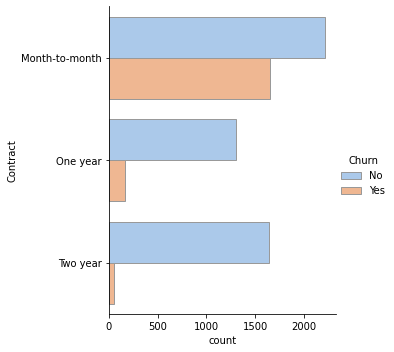

In [ ]:
sns.catplot(y="Contract", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

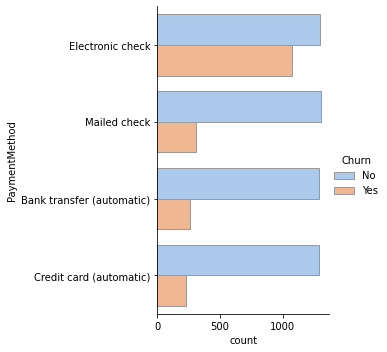

In [ ]:
sns.catplot(y="PaymentMethod", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

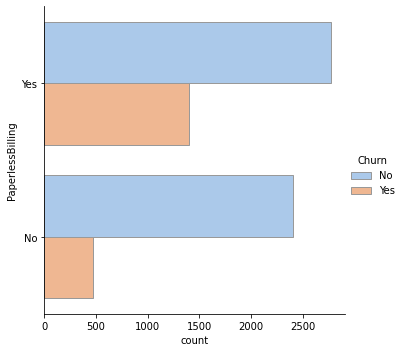

In [ ]:
sns.catplot(y="PaperlessBilling", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','Contract'], aggfunc = ['count','mean'])

count           mean
                     MonthlyCharges MonthlyCharges
Churn Contract                                    
No    Month-to-month           2220      61.462635
      One year                 1307      62.508148
      Two year                 1647      60.012477
Yes   Month-to-month           1655      73.019396
      One year                  166      85.050904
      Two year                   48      86.777083

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','PaymentMethod'], aggfunc = ['count','mean'])

count           mean
                                MonthlyCharges MonthlyCharges
Churn PaymentMethod                                          
No    Bank transfer (automatic)           1286      65.049417
      Credit card (automatic)             1290      64.562209
      Electronic check                    1294      74.232032
      Mailed check                        1304      41.403911
Yes   Bank transfer (automatic)            258      77.875581
      Credit card (automatic)              232      77.356034
      Electronic check                    1071      78.700980
      Mailed check                         308      54.557143

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','PaperlessBilling'], aggfunc = ['count','mean'])

count           mean
                       MonthlyCharges MonthlyCharges
Churn PaperlessBilling                              
No    No                         2403      49.813962
      Yes                        2771      71.195525
Yes   No                          469      63.157463
      Yes                        1400      78.221429

Visualization based on services they signed up.

---
Customers are likely to churn when they don't have online security, online backup, device protection, and tech support. 

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','SeniorCitizen','OnlineSecurity'], aggfunc = ['count','mean'])

count           mean
                                        MonthlyCharges MonthlyCharges
Churn SeniorCitizen OnlineSecurity                                   
No    0             No                            1636      73.024267
                    No internet service           1366      21.102709
                    Yes                           1506      76.996348
      1             No                             401      81.156858
                    No internet service             47      22.105319
                    Yes                            218      87.855046
Yes   0             No                            1054      75.756831
                    No internet service            108      20.385648
                    Yes                            231      80.787446
      1             No                             407      80.872359
                    No internet service              5      19.990000
                    Yes                             64      84.446875

Text(0.5, 1.0, 'InternetService <--> Churn')

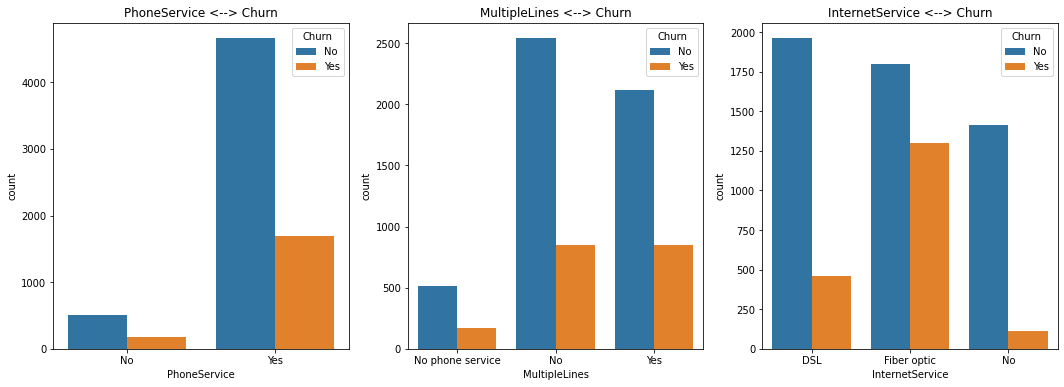

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(data.PhoneService,hue=data.Churn,ax=ax[0])
ax[0].set_title('PhoneService <--> Churn')
sns.countplot(data.MultipleLines,hue=data.Churn,ax=ax[1])
ax[1].set_title('MultipleLines <--> Churn')
sns.countplot(data.InternetService,hue=data.Churn,ax=ax[2])
ax[2].set_title('InternetService <--> Churn')

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','PhoneService'], aggfunc = ['count','mean'])

count           mean
                   MonthlyCharges MonthlyCharges
Churn PhoneService                              
No    No                      512      43.520996
      Yes                    4662      63.213857
Yes   No                      170      37.533824
      Yes                    1699      78.134255

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','MultipleLines'], aggfunc = ['count','mean'])

count           mean
                       MonthlyCharges MonthlyCharges
Churn MultipleLines                                 
No    No                         2541      49.855037
      No phone service            512      43.520996
      Yes                        2121      79.217987
Yes   No                          849      67.184452
      No phone service            170      37.533824
      Yes                         850      89.071176

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','InternetService'], aggfunc = ['count','mean'])

count           mean
                      MonthlyCharges MonthlyCharges
Churn InternetService                              
No    DSL                       1962      60.212105
      Fiber optic               1799      93.932379
      No                        1413      21.136058
Yes   DSL                        459      49.083224
      Fiber optic               1297      88.126484
      No                         113      20.368142

Text(0.5, 1.0, 'DeviceProtection <--> Churn')

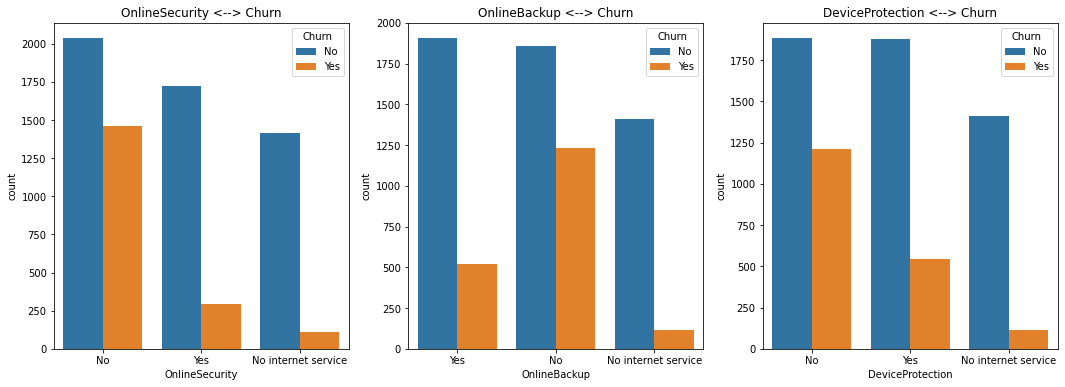

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(data.OnlineSecurity,hue=data.Churn,ax=ax[0])
ax[0].set_title('OnlineSecurity <--> Churn')
sns.countplot(data.OnlineBackup,hue=data.Churn,ax=ax[1])
ax[1].set_title('OnlineBackup <--> Churn')
sns.countplot(data.DeviceProtection,hue=data.Churn,ax=ax[2])
ax[2].set_title('DeviceProtection <--> Churn')

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','OnlineSecurity'], aggfunc = ['count','mean'])

count           mean
                          MonthlyCharges MonthlyCharges
Churn OnlineSecurity                                   
No    No                            2037      74.625233
      No internet service           1413      21.136058
      Yes                           1724      78.369432
Yes   No                            1461      77.181896
      No internet service            113      20.368142
      Yes                            295      81.581356

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','OnlineBackup'], aggfunc = ['count','mean'])

count           mean
                          MonthlyCharges MonthlyCharges
Churn OnlineBackup                                     
No    No                            1855      70.226792
      No internet service           1413      21.136058
      Yes                           1906      82.292655
Yes   No                            1233      74.512449
      No internet service            113      20.368142
      Yes                            523      85.956788

In [ ]:
pd.pivot_table(data, values = ['MonthlyCharges'], index = ['Churn','DeviceProtection'], aggfunc = ['count','mean'])

count           mean
                          MonthlyCharges MonthlyCharges
Churn DeviceProtection                                 
No    No                            1884      68.873673
      No internet service           1413      21.136058
      Yes                           1877      83.837240
Yes   No                            1211      73.288398
      No internet service            113      20.368142
      Yes                            545      88.214679

Text(0.5, 1.0, 'StreamingMovies <--> Churn')

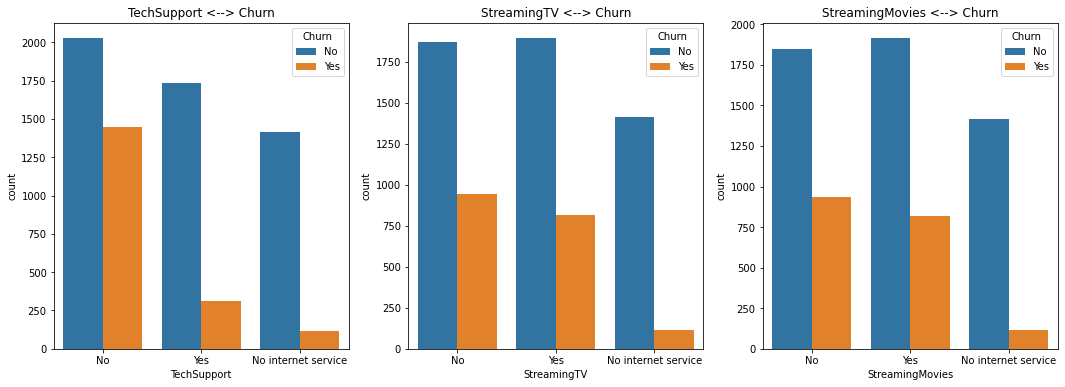

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(data.TechSupport,hue=data.Churn,ax=ax[0])
ax[0].set_title('TechSupport <--> Churn')
sns.countplot(data.StreamingTV,hue=data.Churn,ax=ax[1])
ax[1].set_title('StreamingTV <--> Churn')
sns.countplot(data.StreamingMovies,hue=data.Churn,ax=ax[2])
ax[2].set_title('StreamingMovies <--> Churn')

# Correlation


---

TotalCharges and tenure have strong positive correlation  

monthly charges and total charges have strong positive correlation 

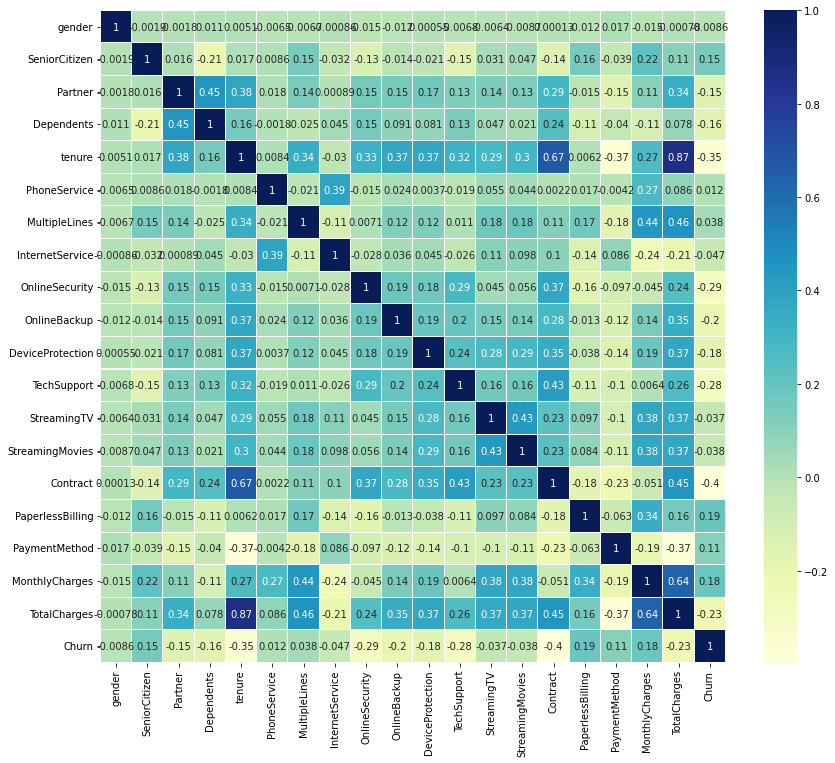

In [ ]:
data1 = data

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data1[column])


plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Data Pre-processing

In [ ]:
#Check missing values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check duplicate data
data.duplicated().sum() 

22

In [ ]:
#check categorical attributes 
# get X and y
df_X = data.drop(['Churn','tenure','SeniorCitizen',	'MonthlyCharges','TotalCharges'],axis=1)
df_y = data[['Churn']]

#check categorical attributes
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index([], dtype='object')


#### Simple Pre-processing
- Label Endocing
- One hot encoding

##### Label Encoding for Target Variable

In [ ]:
#label encoding (categorical encoding)
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  df_X[i] = cat_en.fit_transform(df_X[i])

df_X

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [ ]:
# Label Encoding
le = LabelEncoder()

data['Churn'] = le.fit_transform(data['Churn'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,1


##### One hot encoding

In [ ]:
#one hot encode
df_onehot = pd.get_dummies(df_X, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'], drop_first=False)
df_onehot.head()

,gender_0,gender_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
data_dumm = pd.get_dummies(data, prefix_sep='_')
data_dumm.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X = data_dumm.drop(["Churn"], axis=1)
y = data_dumm['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

### Modelling (regresi)

In [ ]:
# modelling with logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict_train = clf.predict(X_train)
y_predict_test = clf.predict(X_test) #

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.804868154158215
Testing Accuracy: 0.8097491717936584
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113



### Evaluation Metrics

In [ ]:
# Show the evaluation metrics
def evaluation_metrics(y_true, preds, model_name=None):
  """
  y_true - the y values that are actually true in the dataset (numpy array or pandas series)
  preds - the predictions for those values from some model (numpy array or pandas series)
  model_name - (str - optional) a name associated with the model if you would like to add it to the print statements  
  """

  if model_name == None:
    print('Accuracy score: ', format(round(accuracy_score(y_true, preds),4)))
    print('Precision score: ', format(round(precision_score(y_true, preds),4)))
    print('Recall score: ', format(round(recall_score(y_true, preds),4)))
    print('F1 score: ', format(round(f1_score(y_true, preds),4)))

  else:
    print('Accuracy score for ' + model_name + ' :' , format(round(accuracy_score(y_true, preds),4)))
    print('Precision score ' + model_name + ' :', format(round(precision_score(y_true, preds),4)))
    print('Recall score ' + model_name + ' :', format(round(recall_score(y_true, preds),4)))
    print('F1 score ' + model_name + ' :', format(round(f1_score(y_true, preds),4)))

In [ ]:
evaluation_metrics(y_test,y_predict_test)

Accuracy score:  0.8097
Precision score:  0.6784
Recall score:  0.5697
F1 score:  0.6193


In [ ]:
# Evaluation metrics using ROC curve
def roc_curve_plot(y_test, y_preds):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

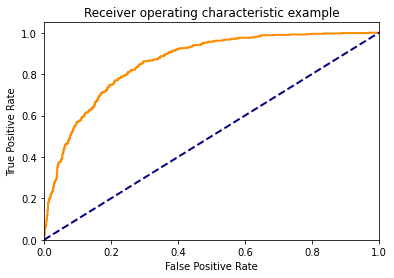

0.7344858306561344

In [ ]:
# ROC AUC
y_prob_clf = clf.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf)

### Hyperparameter Tuning
- Cross Validation
- Grid Search CV

##### **Cross Validation**

In [ ]:
#Hyperparameter Tuning 
#Using cross validation with 10 fold
scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
print(scores)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.84276217 0.86835422 0.84816138 0.86347407 0.84282005 0.82236577
 0.83899296 0.83432803 0.83447284 0.83864128]

Average of roc auc using CV 10 fold (0.84344) and the standard deviation (0.01302)


##### **Grid Search CV**

In [ ]:
# parameter for logistic regresion

param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 1,  4, 20),
    #'solver' : ['lbfgs','newton-cg','liblinear','saga'],
    'max_iter' : [100, 1000]
    }
]

# logistic regression
clf = LogisticRegression()

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(clf, param_grid=param_grid, cv=10, verbose= 5, n_jobs = 4)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
#grid_objt.best_estimator_
print(f'Best parameters {grid_objt.best_estimator_}')

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters LogisticRegression(C=0.21544346900318845)


In [ ]:
# modelling using logistic regression (after tuning)
clf_tuning = LogisticRegression(C=0.21544346900318845)
clf_tuning.fit(X_train, y_train)

y_pred_clf_tuning = clf_tuning.predict(X_test)
 
evaluation_metrics(y_test, y_pred_clf_tuning)

Accuracy score:  0.8116
Precision score:  0.6849
Recall score:  0.5679
F1 score:  0.621


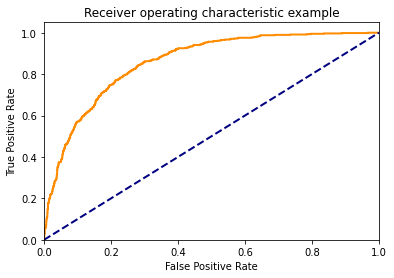

0.7352391819657546

In [ ]:
# ROC AUC (after tuning)
y_prob_clf_tuning  = clf_tuning.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf_tuning)

### Modelling (xgboost)

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_predict_train = xgboost.predict(X_train)
y_predict_test = xgboost.predict(X_test) 

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8186612576064909
Testing Accuracy: 0.8035967818267865
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



### Evaluation Metrics

In [ ]:
evaluation_metrics(y_test, y_predict_test)

Accuracy score:  0.8036
Precision score:  0.6787
Recall score:  0.5261
F1 score:  0.5927


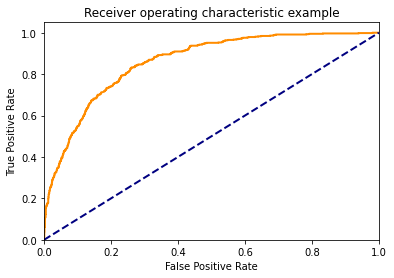

0.7166074626493967

In [ ]:
# ROC AUC
y_prob_xgb = xgboost.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_xgb)

### Hyperparameter Tuning
- Cross Validation
- Grid Search CV

##### **Cross Validation**

In [ ]:
# Using cross validation with 10 fold
scores = cross_val_score(xgboost, X, y, cv=10, scoring='roc_auc')
print(scores)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.85128425 0.87105899 0.85450519 0.86604808 0.84387509 0.81651651
 0.84980192 0.83758624 0.84514734 0.84983295]

Average of roc auc using CV 10 fold (0.84857) and the standard deviation (0.01428)


##### **Grid Search CV**

In [ ]:
# paramater for XGBoost
param_dist = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# xgboost classifier
xgboost = XGBClassifier()

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(xgboost, param_grid=param_dist, cv=10, verbose= 5, n_jobs = 4)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
#grid_objt.best_estimator_
print(f'Best parameters {grid_objt.best_estimator_}')

Fitting 10 folds for each of 45 candidates, totalling 450 fits
Best parameters XGBClassifier(gamma=5, max_depth=4, min_child_weight=10)


In [ ]:
# modelling using XGBoost Classifier (after tuning)
grid_objt = XGBClassifier(gamma=5, max_depth=4, min_child_weight=10)
grid_objt.fit(X_train, y_train)

y_pred_xgb_tuning = grid_objt.predict(X_test)
 
evaluation_metrics(y_test, y_pred_xgb_tuning)

Accuracy score:  0.8064
Precision score:  0.6905
Recall score:  0.5209
F1 score:  0.5938


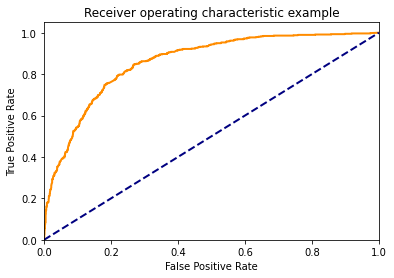

0.7169181988394654

In [ ]:
# ROC AUC (after tuning)
y_prob_xgb_tuning  = grid_objt.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_xgb_tuning)


###Modelling (KNN)


In [ ]:
# modelling with KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict_train = KNN.predict(X_train)
y_predict_test = KNN.predict(X_test) #

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8283975659229209
Testing Accuracy: 0.7685754850922859
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1539
           1       0.60      0.46      0.52       574

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



###Evaluation Metrics

In [ ]:
evaluation_metrics(y_test,y_predict_test)

Accuracy score:  0.7686
Precision score:  0.5964
Recall score:  0.4582
F1 score:  0.5182


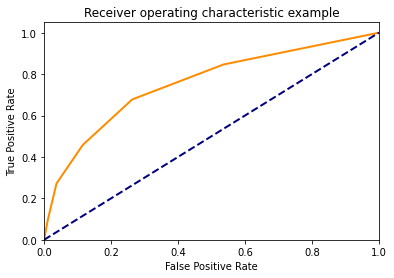

0.6712643170709067

In [ ]:
# ROC AUC
y_prob_knn = KNN.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_knn)

###Hyperparameter Tuning


*   Cross Validation
*   Grid Search CV



####Cross Validation

In [ ]:
# Using cross validation with 10 fold
scoresknn = cross_val_score(KNN, X, y, cv=10, scoring='roc_auc')
print(scoresknn)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scoresknn.mean(), scoresknn.std()))

[0.72748952 0.78128033 0.75267896 0.76305684 0.74169675 0.70899058
 0.76497481 0.71882208 0.73752314 0.77006382]

Average of roc auc using CV 10 fold (0.74666) and the standard deviation (0.02249)


####Grid Search CV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
# knn classifier
knn = KNeighborsClassifier()

# Run a Grid Search CV over the hyperparameters
knn_cv = GridSearchCV(knn, param_grid=grid_params, cv=10)

# Fit the model on the training data
knn_cv.fit(X_train, y_train)

# show the best estimator that we have choosed
#grid_objt.best_estimator_
print(f'Best parameters {knn_cv.best_estimator_}')

Best parameters KNeighborsClassifier(metric='manhattan', n_neighbors=15)


In [ ]:
# After tuning using knn
knn_cv = KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [ ]:
# modelling using knn Classifier (after tuning)
knn_cv.fit(X_train, y_train)

y_pred_knn_tuning = knn_cv.predict(X_test)

evaluation_metrics(y_test, y_pred_knn_tuning)

Accuracy score:  0.7851
Precision score:  0.6493
Recall score:  0.4547
F1 score:  0.5348


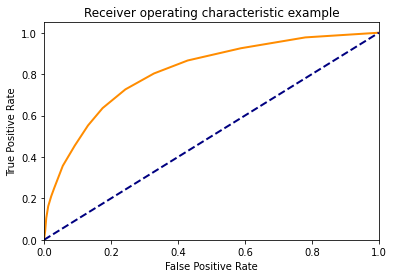

0.6815429495147082

In [ ]:
# ROC AUC (after tuning)
y_prob_knn_tuning  = knn_cv.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_knn_tuning)

### Modelling (Random Forest)

In [ ]:
# modelling with Random Forest
RF2 = RandomForestClassifier()
RF2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict_train = RF2.predict(X_train)
y_predict_test = RF2.predict(X_test)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.9983772819472616
Testing Accuracy: 0.7908187411263606
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



### Evaluation Metrics

In [ ]:
y_pred_RF2 = RF2.predict(X_test)

In [ ]:
#evaluation metrics
evaluation_metrics(y_test,y_pred_RF2)

Accuracy score:  0.7908
Precision score:  0.6602
Recall score:  0.4739
F1 score:  0.5517


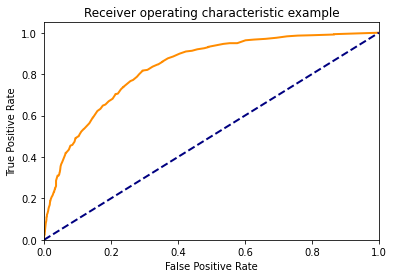

0.6914497173376078

In [ ]:
# ROC AUC
y_prob_clf = RF2.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf)

### Hyperparameter Tuning


1.   Cross Validation
2.   Grid Search CV



#### Cross Validation

In [ ]:
# Using cross validation with 10 fold
scoresRF2 = cross_val_score(RF2, X, y, cv=10, scoring='roc_auc')
print(scoresRF2)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scoresRF2.mean(), scoresRF2.std()))

[0.83443623 0.84126525 0.83047199 0.83115373 0.81564766 0.78761158
 0.81365136 0.80675741 0.81641825 0.83283857]

Average of roc auc using CV 10 fold (0.82103) and the standard deviation (0.01531)


#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
# paramater for random forest
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [3, 5, 7, 9, 11, 13],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [25, 10, 15, 20, 25]}

RF2 = RandomForestClassifier() 
RF3 = GridSearchCV(estimator = RF2, param_grid = grid_search, 
                               cv = 10, verbose= 5, n_jobs = -1)

# modelling using random forest (after tuning)
RF3.fit(X_train,y_train)

predictionforest = RF3.best_estimator_.predict(X_test)
evaluation_metrics(y_test,predictionforest)
#print(classification_report(y_test,predictionforest))
#acc4 = accuracy_score(y_test,predictionforest)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Accuracy score:  0.8041
Precision score:  0.6942
Recall score:  0.4983
F1 score:  0.5801


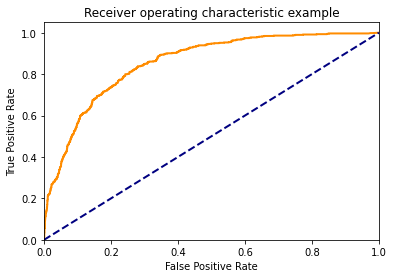

0.7081932473460074

In [ ]:
# ROC AUC (after tuning)
y_prob_RF3_tuning  = RF3.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_RF3_tuning)

### Model (Gradient boosting)

In [ ]:
# modelling with gradient boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_predict_train = gb_clf.predict(X_train)
y_predict_test = gb_clf.predict(X_test)

training_acc = accuracy_score(y_train, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8269776876267748
Testing Accuracy: 0.8064363464268812
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### Evaluation Metrics

In [ ]:
evaluation_metrics(y_test,y_predict_test)

Accuracy score:  0.8064
Precision score:  0.6846
Recall score:  0.5331
F1 score:  0.5994


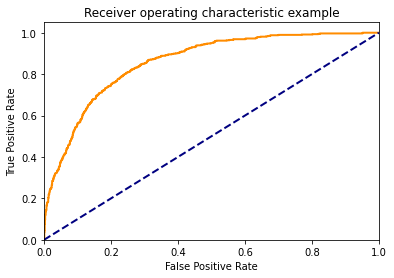

0.7207415557864851

In [ ]:
# ROC AUC
y_prob_clf = gb_clf.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf)

### Hyperparameter Tuning



*   Cross Validation
*   Grid Search CV





#### Cross Validation

In [ ]:
gb_clf_cv = cross_val_score(gb_clf, X, y, cv=10, scoring='roc_auc')
print(gb_clf_cv)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(gb_clf_cv.mean(), gb_clf_cv.std()))

[0.84677802 0.86599013 0.85138748 0.86529041 0.84729879 0.81788703
 0.84779011 0.83660878 0.84236494 0.85031393]

Average of roc auc using CV 10 fold (0.84717) and the standard deviation (0.01305)


####Grid Search CV

In [ ]:
# paramater for gradien boosting
grid_search = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gb = GradientBoostingClassifier() 
gb_cv = GridSearchCV(estimator = gb, param_grid = grid_search, 
                               cv = 10, verbose= 5, n_jobs = -1)

# modelling using random forest (after tuning)
gb_cv.fit(X_train,y_train)

print(f'Best parameters {gb_cv.best_estimator_}') 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters GradientBoostingClassifier(max_depth=1, n_estimators=500)


In [ ]:
gb_cv = GradientBoostingClassifier(max_depth=1, n_estimators=500)
gb_cv.fit(X_train, y_train)

y_pred_gb_tuning = gb_cv.predict(X_test)

evaluation_metrics(y_test, y_pred_gb_tuning)

Accuracy score:  0.8027
Precision score:  0.6821
Recall score:  0.5122
F1 score:  0.5851


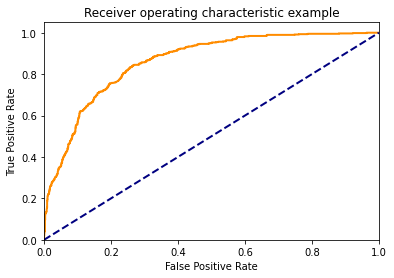

0.7115881392732056

In [ ]:
# ROC AUC (after tuning)
y_prob_gb_tuning  = gb_cv.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_gb_tuning)

#Modelling with Handling Imbalance Data-Oversampling (SMOTE)

In [ ]:
# Oversampling
# Handling imbalance data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=43, sampling_strategy=1)

In [ ]:
# Fit the over sampling
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before over sampling: {}".format(Counter(y_train)))
print("After over sampling: {}".format(Counter(y_train_smote)))

Before over sampling: Counter({0: 3635, 1: 1295})
After over sampling: Counter({0: 3635, 1: 3635})


### Modelling (regresi)

In [ ]:
# modelling with logistic regression
clf = LogisticRegression()
clf.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
y_predict_train = clf.predict(X_train_smote)
y_predict_test = clf.predict(X_test)

training_acc = accuracy_score(y_train_smote, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8418156808803301
Testing Accuracy: 0.7841930903928065
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1539
           1       0.59      0.67      0.63       574

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.79      0.78      0.79      2113



### Evaluation Metrics

In [ ]:
# Show the evaluation metrics
def evaluation_metrics(y_true, preds, model_name=None):
  """
  y_true - the y values that are actually true in the dataset (numpy array or pandas series)
  preds - the predictions for those values from some model (numpy array or pandas series)
  model_name - (str - optional) a name associated with the model if you would like to add it to the print statements  
  """

  if model_name == None:
    print('Accuracy score: ', format(round(accuracy_score(y_true, preds),4)))
    print('Precision score: ', format(round(precision_score(y_true, preds),4)))
    print('Recall score: ', format(round(recall_score(y_true, preds),4)))
    print('F1 score: ', format(round(f1_score(y_true, preds),4)))

  else:
    print('Accuracy score for ' + model_name + ' :' , format(round(accuracy_score(y_true, preds),4)))
    print('Precision score ' + model_name + ' :', format(round(precision_score(y_true, preds),4)))
    print('Recall score ' + model_name + ' :', format(round(recall_score(y_true, preds),4)))
    print('F1 score ' + model_name + ' :', format(round(f1_score(y_true, preds),4)))

In [ ]:
evaluation_metrics(y_test,y_predict_test)

Accuracy score:  0.7842
Precision score:  0.5902
Recall score:  0.6725
F1 score:  0.6287


In [ ]:
# Evaluation metrics using ROC curve
def roc_curve_plot(y_test, y_preds):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

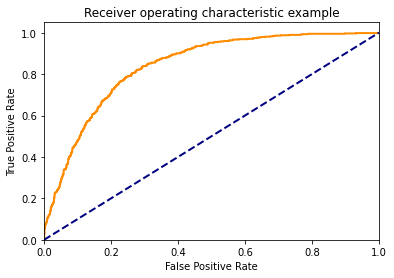

0.7491674081318926

In [ ]:
# ROC AUC
y_prob_clf = clf.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf)

### Hyperparameter Tuning



*   Cross Validation
*   Grid Search CV





#### Cross Validation

In [ ]:
#Hyperparameter Tuning 
#Using cross validation with 10 fold
scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
print(scores)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.84276217 0.86835422 0.84816138 0.86347407 0.84282005 0.82236577
 0.83899296 0.83432803 0.83447284 0.83864128]

Average of roc auc using CV 10 fold (0.84344) and the standard deviation (0.01302)


####Grid Search CV

In [ ]:
# parameter for logistic regresion

param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 1,  4, 20),
    #'solver' : ['lbfgs','newton-cg','liblinear','saga'],
    'max_iter' : [100, 1000]
    }
]
# logistic regression
clf = LogisticRegression()

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(clf, param_grid=param_grid, cv=10, verbose= 5, n_jobs = 4)

# Fit the model on the training data
grid_objt.fit(X_train_smote, y_train_smote)

# show the best estimator that we have choosed
#grid_objt.best_estimator_
print(f'Best parameters {grid_objt.best_estimator_}')

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters LogisticRegression(C=0.21544346900318845, max_iter=1000)


In [ ]:
grid_objt = LogisticRegression(C=0.21544346900318845, max_iter=1000)

grid_objt.fit(X_train_smote, y_train_smote)

y_pred_clf_tuning = grid_objt.predict(X_test)

evaluation_metrics(y_test, y_pred_clf_tuning)

Accuracy score:  0.8012
Precision score:  0.6351
Recall score:  0.6307
F1 score:  0.6329


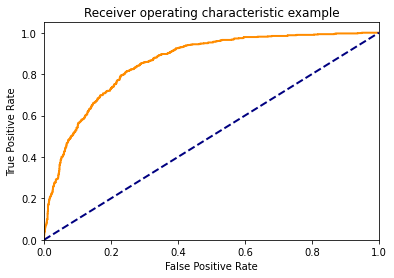

0.747754662174859

In [ ]:
# ROC AUC (after tuning)
y_prob_clf_tuning  = grid_objt.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf_tuning)

### Modelling (xgboost)

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train_smote, y_train_smote)

XGBClassifier()

In [ ]:
y_predict_train = xgboost.predict(X_train_smote)
y_predict_test = xgboost.predict(X_test) 

training_acc = accuracy_score(y_train_smote, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8709766162310867
Testing Accuracy: 0.7950780880265026
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1539
           1       0.62      0.63      0.63       574

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.80      0.80      0.80      2113



### Evaluation Metrics

In [ ]:
y_pred_xgb = xgboost.predict(X_test)

evaluation_metrics(y_test, y_pred_xgb)

Accuracy score:  0.7951
Precision score:  0.6209
Recall score:  0.6307
F1 score:  0.6258


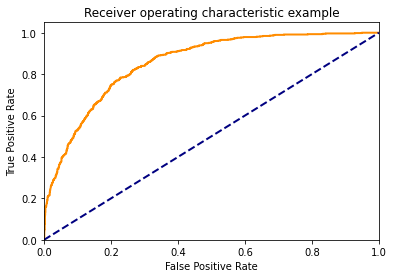

0.7435311404074776

In [ ]:
# ROC AUC
y_prob_xgb = xgboost.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_xgb)

### Hyperparameter Tuning
- Cross Validation
- Grid Search CV

##### **Cross Validation**

In [ ]:
# Using cross validation with 10 fold
scores = cross_val_score(xgboost, X, y, cv=10, scoring='roc_auc')
print(scores)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.85128425 0.87105899 0.85450519 0.86604808 0.84387509 0.81651651
 0.84980192 0.83758624 0.84514734 0.84983295]

Average of roc auc using CV 10 fold (0.84857) and the standard deviation (0.01428)


##### **Grid Search CV**

In [ ]:
# paramater for XGBoost
param_dist = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
# xgboost classifier
xgboost = XGBClassifier()

# Run a Grid Search CV over the hyperparameters
grid_objt_xg = GridSearchCV(xgboost, param_grid=param_dist, cv=10)

# Fit the model on the training data
grid_objt_xg.fit(X_train_smote, y_train_smote)

# show the best estimator that we have choosed
#grid_objt.best_estimator_
print(f'Best parameters {grid_objt_xg.best_estimator_}')

Best parameters XGBClassifier(gamma=0.5)


In [ ]:
# After tuning using XGBoost
xgboost = XGBClassifier(gamma=5, max_depth=4)

In [ ]:
# modelling using XGBoost Classifier (after tuning)
xgboost.fit(X_train_smote, y_train_smote)

y_pred_xgb_tuning = xgboost.predict(X_test)

evaluation_metrics(y_test, y_pred_xgb_tuning)

Accuracy score:  0.797
Precision score:  0.6256
Recall score:  0.6289
F1 score:  0.6273


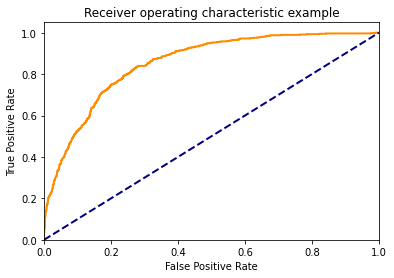

0.7442844917170977

In [ ]:
# ROC AUC (after tuning)
y_prob_xgb_tuning  = xgboost.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_xgb_tuning)


###Modelling (KNN)


In [ ]:
# modelling with KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [ ]:
y_predict_train = KNN.predict(X_train_smote)
y_predict_test = KNN.predict(X_test) #

training_acc = accuracy_score(y_train_smote, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8456671251719394
Testing Accuracy: 0.7070515854235684
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1539
           1       0.47      0.67      0.56       574

    accuracy                           0.71      2113
   macro avg       0.66      0.70      0.67      2113
weighted avg       0.75      0.71      0.72      2113



###Evaluation Metrics

In [ ]:
evaluation_metrics(y_test,y_predict_test)

Accuracy score:  0.7071
Precision score:  0.4725
Recall score:  0.6742
F1 score:  0.5556


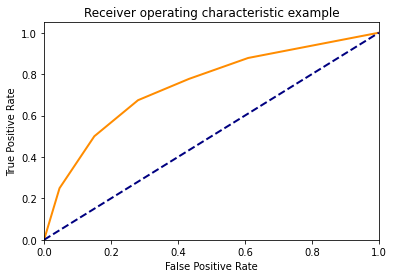

0.6967571367442997

In [ ]:
# ROC AUC
y_prob_knn = KNN.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_knn)

###Hyperparameter Tuning


*   Cross Validation
*   Grid Search CV



####Cross Validation

In [ ]:
# Using cross validation with 10 fold
scoresknn = cross_val_score(KNN, X, y, cv=10, scoring='roc_auc')
print(scoresknn)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scoresknn.mean(), scoresknn.std()))

[0.72748952 0.78128033 0.75267896 0.76305684 0.74169675 0.70899058
 0.76497481 0.71882208 0.73752314 0.77006382]

Average of roc auc using CV 10 fold (0.74666) and the standard deviation (0.02249)


####Grid Search CV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
# knn classifier
knn = KNeighborsClassifier()

# Run a Grid Search CV over the hyperparameters
knn_cv = GridSearchCV(knn, param_grid=grid_params, cv=10)

# Fit the model on the training data
knn_cv.fit(X_train_smote, y_train_smote)

# show the best estimator that we have choosed
#grid_objt.best_estimator_
print(f'Best parameters {knn_cv.best_estimator_}')

Best parameters KNeighborsClassifier(metric='manhattan', weights='distance')


In [ ]:
# After tuning using knn
knn_cv = KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
# modelling using knn Classifier (after tuning)
knn_cv.fit(X_train_smote, y_train_smote)

y_pred_knn_tuning = knn_cv.predict(X_test)

evaluation_metrics(y_test, y_pred_knn_tuning)

Accuracy score:  0.7189
Precision score:  0.4873
Recall score:  0.6672
F1 score:  0.5632


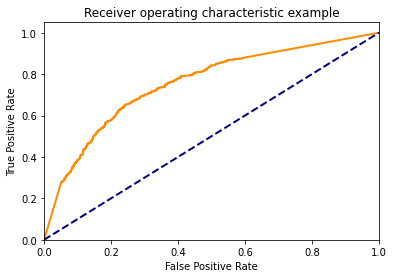

0.702694518590967

In [ ]:
# ROC AUC (after tuning)
y_prob_knn_tuning  = knn_cv.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_knn_tuning)

### Modelling (Random Forest)

In [ ]:
# modelling with Random Forest
RF2 = RandomForestClassifier()
RF2.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [ ]:
y_predict_train = RF2.predict(X_train_smote)
y_predict_test = RF2.predict(X_test) 

training_acc = accuracy_score(y_train_smote, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.9988995873452545
Testing Accuracy: 0.7879791765262659
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.63      0.53      0.57       574

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



### Evaluation Metrics

In [ ]:
y_pred_RF2 = RF2.predict(X_test)

In [ ]:
#evaluation metrics
evaluation_metrics(y_test,y_pred_RF2)

Accuracy score:  0.788
Precision score:  0.6312
Recall score:  0.5279
F1 score:  0.575


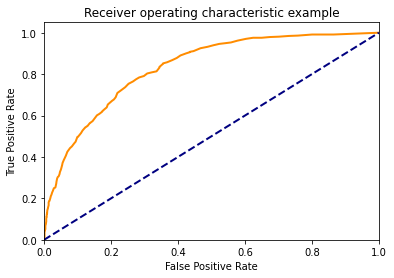

0.7064324089356182

In [ ]:
# ROC AUC
y_prob_clf = RF2.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_clf)

### Hyperparameter Tuning


1.   Cross Validation
2.   Grid Search CV



#### Cross Validation

In [ ]:
# Using cross validation with 10 fold
scoresRF2 = cross_val_score(RF2, X, y, cv=10, scoring='roc_auc')
print(scoresRF2)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scoresRF2.mean(), scoresRF2.std()))

[0.83041005 0.84141494 0.82641484 0.83737597 0.81980575 0.78525326
 0.81233774 0.80618335 0.81984195 0.82501888]

Average of roc auc using CV 10 fold (0.82041) and the standard deviation (0.01546)


#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
# paramater for random forest
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [3, 5, 7, 9, 11, 13],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [25, 10, 15, 20, 25]}

RF2 = RandomForestClassifier() 
RF3 = GridSearchCV(estimator = RF2, param_grid = grid_search, 
                               cv = 10, verbose= 5, n_jobs = -1)

# modelling using random forest (after tuning)
RF3.fit(X_train_smote,y_train_smote)

print(f'Best parameters {RF3.best_estimator_}') 

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best parameters RandomForestClassifier(criterion='entropy', max_depth=13, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=5,
                       n_estimators=20)


In [ ]:
RF3 = RandomForestClassifier(criterion='entropy', max_depth=13, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=5,
                       n_estimators=20)
RF3.fit(X_train_smote, y_train_smote)

y_pred_rf_tuning = RF3.predict(X_test)

evaluation_metrics(y_test, y_pred_rf_tuning)

#print(classification_report(y_test,predictionforest))
#acc4 = accuracy_score(y_test,predictionforest)

Accuracy score:  0.7956
Precision score:  0.6175
Recall score:  0.6498
F1 score:  0.6333


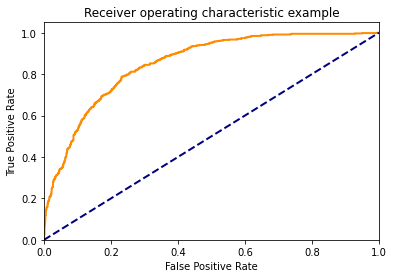

0.7498641590425928

In [ ]:
# ROC AUC (after tuning)
y_prob_RF3_tuning  = RF3.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_RF3_tuning)

### Model (Gradient boosting)

In [ ]:
# modelling with Gradien Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

In [ ]:
y_predict_train = gb_clf.predict(X_train_smote)
y_predict_test = gb_clf.predict(X_test) #

training_acc = accuracy_score(y_train_smote, y_predict_train)
testing_acc = accuracy_score(y_test, y_predict_test)

print("Training Accuracy: {}".format(training_acc))
print("Testing Accuracy: {}".format(testing_acc))

print(classification_report(y_test, y_predict_test))

Training Accuracy: 0.8749656121045392
Testing Accuracy: 0.8002839564600095
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1539
           1       0.64      0.62      0.63       574

    accuracy                           0.80      2113
   macro avg       0.75      0.74      0.75      2113
weighted avg       0.80      0.80      0.80      2113



### Evalution metrics

In [ ]:
evaluation_metrics(y_test,y_predict_test)

Accuracy score:  0.8003
Precision score:  0.6357
Recall score:  0.6202
F1 score:  0.6279


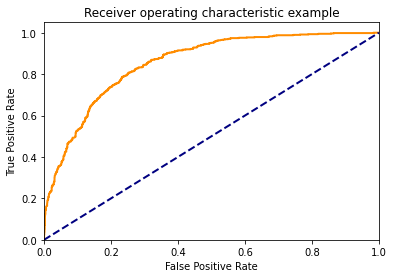

0.7438277264978164

In [ ]:
# ROC AUC
y_prob_gb = gb_clf.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_gb)

### Hyperparameter Tuning


*   Cross Validation
*   Grid Search CV



#### Cross Validation

In [ ]:
# Using cross validation with 10 fold
gb_clf_cv = cross_val_score(gb_clf, X, y, cv=10, scoring='roc_auc')
print(gb_clf_cv)
print()
print("Average of roc auc using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(gb_clf_cv.mean(), gb_clf_cv.std()))

[0.84677802 0.86581463 0.85138748 0.86526965 0.84729879 0.81788703
 0.84780045 0.83655706 0.84233391 0.85033461]

Average of roc auc using CV 10 fold (0.84715) and the standard deviation (0.01303)


#### Grid Search CV

In [ ]:
# paramater for gradien boosting
grid_search = {
    "n_estimators":[250,500],
    "max_depth":[1,3,5]
    #"learning_rate":[10,100]
}


gb = GradientBoostingClassifier() 
gb_cv = GridSearchCV(estimator = gb, param_grid = grid_search, 
                               cv = 10, verbose= 5, n_jobs = -1)

# modelling using random forest (after tuning)
gb_cv.fit(X_train_smote,y_train_smote)

print(f'Best parameters {gb_cv.best_estimator_}') 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters GradientBoostingClassifier(max_depth=1, n_estimators=500)


In [ ]:
gb_cv = GradientBoostingClassifier(max_depth=1, n_estimators=500)
gb_cv.fit(X_train_smote, y_train_smote)

y_pred_gb_tuning = gb_cv.predict(X_test)

evaluation_metrics(y_test, y_pred_gb_tuning)

Accuracy score:  0.7998
Precision score:  0.6208
Recall score:  0.676
F1 score:  0.6472


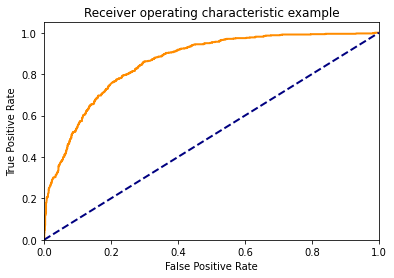

0.7609810433943939

In [ ]:
# ROC AUC (after tuning)
y_prob_gb_tuning  = gb_cv.predict_proba(X_test)
roc_curve_plot(y_test, y_prob_gb_tuning)